# **Face Mask Detection using Transfer Learning with Alert System**

In [ ]:
## Mounted Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/Project_Work")
Dataset = 'dataset'
Data_Dir = os.listdir(Dataset)
print(Data_Dir)

['with_mask', 'without_mask']


In [ ]:
## Importing necessary Libraries 
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer


In [ ]:
##Set image  size
img_rows, img_cols = 112,112
images = []
labels = []

In [ ]:
for category in Data_Dir:
  folder_path = os.path.join(Dataset,category)
  for img in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img)
    img = cv2.imread(img_path)

    try:
      #converting the Image into gray Scale
      grayscale_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

      #Resizing the gray scaled image in order to keep size of the images consistent
      resized_img = cv2.resize(grayscale_img,(img_rows,img_cols))
      images.append(resized_img)
      labels.append(category)
    # Exception Handling
    except Exception as e:
      print("Exception:",e)

images = np.array(images)/255.0
images = np.reshape(images,(images.shape[0],img_rows,img_cols,1))

# perform One hot encoding on the label sine the label are in textual form

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
labels = np.array(labels)

In [ ]:
## train test split of dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images,labels,test_size=0.25, random_state=0)

# **Building CNN Classification Model**

In [ ]:
# import Necessary Keras Libraries

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation, Flatten,Dropout
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
# Define model parameters
num_classes = 2
batch_size = 32

# Build CNN Model using Sequential API
model = Sequential()

#First layer group containing Convolution, Relu and Maxpooling layers
model.add(Conv2D(64,(3,3), input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


# Second layer Group containing Convolution, relu and MaxPooling layers
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third layer Group containing Convolution, relu and MaxPooling layers
model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten and Dropout layers to stack the output Convolutions layer

model.add(Flatten())
model.add(Dropout(0.2))

# Softmax Classifier

##final dense layer
model.add(Dense(64,activation='relu'))

##final output layer
model.add(Dense(num_classes,activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 110, 110, 64)      640       
                                                                 
 activation_3 (Activation)   (None, 110, 110, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 activation_4 (Activation)   (None, 53, 53, 128)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 128)      0         
 2D)                                                  

# **Plot the Model**

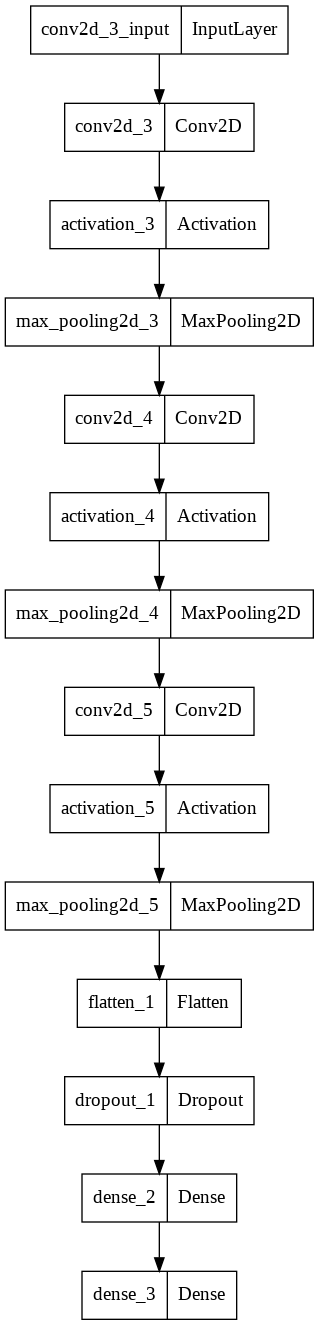

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='face_mask_detection_architecture.png')

# **Train the Classifier Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

epochs = 50

## Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics = ['accuracy'])

## fit the model on the training set 
fitted_model = model.fit(
    x_train,
    y_train,
    epochs = epochs,
    validation_split = 0.25)

Epoch 1/50
68/68 [==============================] - 121s 2s/step - loss: 0.6217 - accuracy: 0.6375 - val_loss: 0.5506 - val_accuracy: 0.7058
Epoch 2/50
68/68 [==============================] - 119s 2s/step - loss: 0.4882 - accuracy: 0.7812 - val_loss: 0.4634 - val_accuracy: 0.7831
Epoch 3/50
68/68 [==============================] - 119s 2s/step - loss: 0.3479 - accuracy: 0.8498 - val_loss: 0.3655 - val_accuracy: 0.8356
Epoch 4/50
68/68 [==============================] - 118s 2s/step - loss: 0.2442 - accuracy: 0.9005 - val_loss: 0.2789 - val_accuracy: 0.9006
Epoch 5/50
68/68 [==============================] - 118s 2s/step - loss: 0.1891 - accuracy: 0.9208 - val_loss: 0.3036 - val_accuracy: 0.8867
Epoch 6/50
68/68 [==============================] - 118s 2s/step - loss: 0.1290 - accuracy: 0.9461 - val_loss: 0.3130 - val_accuracy: 0.8826
Epoch 7/50
68/68 [==============================] - 118s 2s/step - loss: 0.0866 - accuracy: 0.9655 - val_loss: 0.3020 - val_accuracy: 0.8923
Epoch 8/50
68

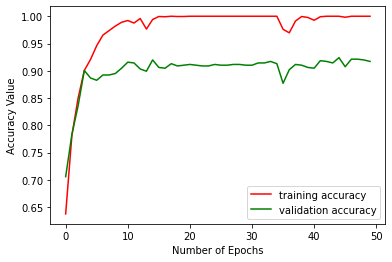

In [ ]:
#Plot the Model Accuracy
from matplotlib import pyplot as plt
plt.plot(fitted_model.history['accuracy'],'r', label='training accuracy')
plt.plot(fitted_model.history['val_accuracy'],'g',label='validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

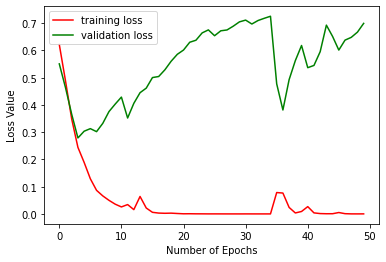

In [ ]:
## Plot the Model Loss
plt.plot(fitted_model.history['loss'],'r', label='training loss')
plt.plot(fitted_model.history['val_loss'],'g',label='validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

# **Test data Accuracy**

In [49]:
model.evaluate(x_test, y_test)

31/31 [==============================] - 13s 407ms/step - loss: 0.4035 - accuracy: 0.9368


[0.4035033583641052, 0.9367875456809998]

In [50]:
y_pred = (model.predict(x_test) > 0.5).astype('int32')

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [52]:
## Accuracy of the model
print(accuracy_score(y_test, y_pred))

0.9367875647668393


# **Save the Classifier Model**

In [ ]:
model.save('face_mask_detection_with_alert_system.h5')